In [58]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# 使用openpyxl加载工作簿
wb = openpyxl.load_workbook('data/商机信息统计.xlsx')
sheet = wb.active

# 获取列字母（A, B, C等）
def get_column_letter(header_name):
    for cell in sheet[1]:  # 第一行
        if cell.value == header_name:
            return cell.column_letter
    return None

# 获取网站链接和原始链接的列
website_col = get_column_letter('网站链接')
original_col = get_column_letter('原始链接')

# 直接读取这两列的所有单元格
if website_col:
    website_cells = sheet[website_col][1:]  # 跳过标题行
if original_col:
    original_cells = sheet[original_col][1:]  # 跳过标题行

# 获取链接
website_links = []
original_links = []

if website_col:
    for cell in website_cells:
        if cell.hyperlink:
            website_links.append(cell.hyperlink.target)
        else:
            website_links.append(cell.value)  # 如果不是超链接，保留原始值

if original_col:
    for cell in original_cells:
        if cell.hyperlink:
            original_links.append(cell.hyperlink.target)
        else:
            original_links.append(cell.value)  # 如果不是超链接，保留原始值

# 使用pandas读取Excel
data = pd.read_excel('data/商机信息统计.xlsx', engine='openpyxl')

# 更新链接列
if website_col:
    data['网站链接'] = website_links
if original_col:
    data['原始链接'] = original_links



In [60]:
import re
import unicodedata

#判断单元格是否为中文的函数
def is_chinese(char):
    code_point = ord(char)
    return 0x4E00 <= code_point <= 0x9FFF

def non_chinese_ratio(text):
    if not text or pd.isna(text): 
        return 0.0
    total_chars = len(text)
    non_chinese_chars = sum(1 for char in text if not is_chinese(char))
    ratio=(non_chinese_chars/total_chars)*100
    return ratio

data["乱码"]=data["公告正文"].apply(non_chinese_ratio)>=70.0
data.head(5)


,类型,标题,项目标签,业务相关性,公告摘要,公告正文,预算金额(万),网站链接,原始链接,采购单位,招标代理,联系方式,发布日期,报名截至日期,预计采购日期,销售部门,客户代表,信息采集时间,处理标志,乱码
0,招标,中国福利彩票发行管理中心2025年信息监测及相关服务项目公开招标公告,北京市-朝阳区|民政,一般,【项目概况】： 2025年信息监测及相关服务项目，预算金额：152.42万元人民币。\n【项...,公告正文\n项目概况\n2025年信息监测及相关服务项目 招标项目的潜在投标人应在中国机械进...,152.42,"=HYPERLINK(""https://www.jianyu360.cn/page_work...","=HYPERLINK(""https://www.ccgp.gov.cn/cggg/zygg/...",中国福利彩票发行管理中心,中国机械进出口集团有限公司,【采购方联系方式】：\n李先生，010-58125705\n【采购方联系方式】：\n陈女士，...,2025-04-29,2025-05-23,NaN,行业推进事业部,陈宣霖,2025-04-30 11:28:51.159,NaN,False
1,招标,中国福利彩票发行管理中心2025年走近双色球项目公开招标公告,北京市-朝阳区|民政,无关,【项目概况】： 中国福利彩票发行管理中心2025年走近双色球项目，预算金额329.52万元。...,公告正文\n项目概况\n中国福利彩票发行管理中心2025年走近双色球项目 招标项目的潜在投标...,329.52,"=HYPERLINK(""https://www.jianyu360.cn/page_work...","=HYPERLINK(""https://www.ccgp.gov.cn/cggg/zygg/...",中国福利彩票发行管理中心,中技国际招标有限公司,【采购方联系方式】：\n李先生，010-58125705\n【采购方联系方式】：\n洪林杨、...,2025-04-29,2025-05-09,NaN,行业推进事业部,陈宣霖,2025-04-30 11:28:19.904,NaN,False
2,竞谈,嘉定校区体育中心泳池池底维修采购项目,上海市-杨浦区|学校,无关,【项目概况】： 工程建设，预算金额：97.788万元\n【项目内容】： 体育中心泳池池底瓷砖...,公告正文\n磋商公告\n一、项目概况\n项目名称：嘉定校区体育中心泳池池底维修\n项目编号：...,97.78,"=HYPERLINK(""https://www.jianyu360.cn/page_work...","=HYPERLINK(""https://czb.tongji.edu.cn/sggl/cgw...",同济大学,上海华建工程建设咨询有限公司,【采购方联系方式】：\n肖老师，021-65983577\n【采购方联系方式】：\n唐寅，0...,2025-04-29,2025-05-03,NaN,教育事业一部,张潞,2025-04-30 11:27:30.202,NaN,False
3,招标,海洋科学传感器一批采购项目招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，预算金额：人民币112.3万元\n【项目内容】： 采购4套声学多普...,公告正文\n海洋科学传感器一批采购（重）-国际招标公告\n上海中世建设咨询有限公司受招标人委...,112.30,"=HYPERLINK(""https://www.jianyu360.cn/page_work...","=HYPERLINK(""https://czb.tongji.edu.cn/sggl/cgw...",同济大学,上海中世建设咨询有限公司,【采购方联系方式】：\n徐老师，021-20926959-1046\n【采购方联系方式】：\...,2025-04-29,2025-05-09,NaN,教育事业一部,张潞,2025-04-30 11:26:59.563,NaN,False
4,招标,同济大学海洋科学传感器一批采购（重）-国际招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，项目预算112.3万元。\n【项目内容】： 采购4套声学多普勒流速...,公告正文\n上海中世建设咨询有限公司受同济大学 委托，根据《中华人民共和国政府采购法》等有关...,112.30,"=HYPERLINK(""https://www.jianyu360.cn/page_work...","=HYPERLINK(""https://www.ccgp.gov.cn/cggg/zygg/...",同济大学,上海中世建设咨询有限公司,【采购方联系方式】：\n徐老师，021-20926959-1046\n【采购方联系方式】：\...,2025-04-29,2025-05-09,NaN,教育事业一部,张潞,2025-04-30 11:26:29.846,NaN,False


In [61]:
data=data[data["乱码"]==False]
data=data[["类型","标题","项目标签","业务相关性","公告摘要","公告正文","采购单位","招标代理"]]
data

,类型,标题,项目标签,业务相关性,公告摘要,公告正文,采购单位,招标代理
0,招标,中国福利彩票发行管理中心2025年信息监测及相关服务项目公开招标公告,北京市-朝阳区|民政,一般,【项目概况】： 2025年信息监测及相关服务项目，预算金额：152.42万元人民币。\n【项...,公告正文\n项目概况\n2025年信息监测及相关服务项目 招标项目的潜在投标人应在中国机械进...,中国福利彩票发行管理中心,中国机械进出口集团有限公司
1,招标,中国福利彩票发行管理中心2025年走近双色球项目公开招标公告,北京市-朝阳区|民政,无关,【项目概况】： 中国福利彩票发行管理中心2025年走近双色球项目，预算金额329.52万元。...,公告正文\n项目概况\n中国福利彩票发行管理中心2025年走近双色球项目 招标项目的潜在投标...,中国福利彩票发行管理中心,中技国际招标有限公司
2,竞谈,嘉定校区体育中心泳池池底维修采购项目,上海市-杨浦区|学校,无关,【项目概况】： 工程建设，预算金额：97.788万元\n【项目内容】： 体育中心泳池池底瓷砖...,公告正文\n磋商公告\n一、项目概况\n项目名称：嘉定校区体育中心泳池池底维修\n项目编号：...,同济大学,上海华建工程建设咨询有限公司
3,招标,海洋科学传感器一批采购项目招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，预算金额：人民币112.3万元\n【项目内容】： 采购4套声学多普...,公告正文\n海洋科学传感器一批采购（重）-国际招标公告\n上海中世建设咨询有限公司受招标人委...,同济大学,上海中世建设咨询有限公司
4,招标,同济大学海洋科学传感器一批采购（重）-国际招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，项目预算112.3万元。\n【项目内容】： 采购4套声学多普勒流速...,公告正文\n上海中世建设咨询有限公司受同济大学 委托，根据《中华人民共和国政府采购法》等有关...,同济大学,上海中世建设咨询有限公司
...,...,...,...,...,...,...,...,...
5626,招标,上海中医药大学附属曙光医院学生宿舍租赁项目公开招标公告,上海市-浦东新区|医疗,无关,【项目概况】： 学生宿舍租赁项目，预算为二室一厅5400元/套/月，三室一厅7200元/套/...,公告正文\n \n上海中医药大学附属曙光医院学生宿舍租赁项目公开招标公告\n(招标编号:XS...,上海中医药大学附属曙光医院,上海欣声招标服务中心有限公司
5627,竞谈,上海中医药大学附属曙光医院宾得电子支气管镜及主机维保项目,上海市-长宁区|医疗,无关,【项目概况】： 医疗器械维保项目，项目预算未明确。\n【项目内容】： 宾得电子支气管镜及主机...,公告正文\n上海中医药大学附属曙光医院宾得电子支气管镜及主机维保项目（招标编号：/）\n项目...,上海中医药大学附属曙光医院,上海财瑞建设管理有限公司
5628,变更,上海中医药大学附属岳阳中西医结合医院医责险招标更正公告,上海市|医疗,无关,【项目概况】： 医责险招标，项目预算未提及。\n【项目内容】： 医责险采购，具体数量及内容未...,公告正文\n上海中医药大学附属岳阳中西医结合医院医责险招标更正公告（招标编号：招 2024-...,上海中医药大学附属岳阳中西医结合医院,上海财瑞建设管理有限公司
5629,招标,同济大学四平路校区综合运动馆项目勘察设计采购项目,上海市|学校,潜在商机,【项目概况】： 工程建设，项目预算14482万元。\n【项目内容】： 拟建一幢综合运动馆，总...,公告正文\n招标公告\n公开招标信息表\n报建编号：\n2501YP0012 \n标段号：\...,同济大学,上海教育建设管理咨询有限公司


In [62]:
单位词典=set()
for i in data["采购单位"]:
    if i not in 单位词典:
        单位词典.add(i)
print(单位词典)
with open("dict.txt","w",encoding="utf-8") as f:
    for i in 单位词典:
        f.write(i + "\n")


{'复旦大学附属妇产科医院工会委员会', '华东理工大学、上海瑞昆建设股份有限公司', '上海大学力学与工程科学学院', '上海市计划生育药具管理事务中心（上海市卫生健康委员会援外物资供应站）', '上海旅游高等专科学校', '上海理工大学/中国建筑第二工程局有限公司', '上海市皮肤病医院工会委员会', '上海海事大学,中建二局第三建筑工程有限公司', '上海市精神卫生中心工会委员会', '上海音乐学院附属中等音乐专科学校', '上海电力大学、中铁四局集团有限公司', '上海中医药大学、上海煜垣建筑工程有限公司', '上海交通大学医学院附属上海儿童医学中心工会委员会', '同济大学出版社有限公司', '上海戏剧学院附属戏曲学校', '东华大学松江校区', '上海市卫生健康委员会', '上海体育大学', '上海交通大学医学院附属瑞金医院、上海建工二建集团有限公司', '上海东海职业技术学院', '上海立信会计金融学院上海市学校体育与艺术教育发展评估中心', '上海市第十人民医院', '上海西郊国际农产品发展有限公司', '上海立信会计金融学院附属高行中学', '复旦大学附属华山医院宝山院区', '中国教育工会上海海关学院委员会', '上海市医疗保障局', '华东师范大学附属六安学校', '上海交通大学医学院附属上海儿童医学中心海南医院', '上海外国语大学附属浦东外国语学校', '上海市嘉定区中心医院（上海健康医学院附属嘉定区中心医院、上海交通大学医学院附属仁济医院嘉定分院）', '复旦大学附属华山医院江苏路分部', '上海交通大学安徽（淮北）陶铝新材料研究院', '上海海事职业技术学院', '上海大学材料科学与工程学院', '上海电机学院附属科技学校', '上海市教育委员会', '上海大学新闻传播学院', '上海交通大学医学院附属瑞金医院海南医院（海南博鳌研究型医院）', '上海体育大学、安徽省南苑建设工程有限公司', '上海市教育委员会财务与资产管理事务中心', '上海交通大学苏州人工智能研究院', '华东政法大学松江校区', '上海市动物疫病预防控制中心', '上海交通大学医学院附属第九人民医院', '上海师范大学附属七星关区实验学校', '上海师范大学附属翔安实验学校项目部', '上海交通大学医学院附属仁济医院安徽医院', '上海济光职业技术学院', '上海

In [63]:
import jieba
import re

# 重新加载词典前先重置jieba
jieba.initialize()  # 重置jieba
print("Loading custom dictionary...")
jieba.load_userdict("dict.txt")

def 精确分词(text):
    # 使用精确模式分词
    seg_list = jieba.cut(text, cut_all=False)
    return list(seg_list)


data['标题分词'] = data['标题'].apply(精确分词)

# 显示前5行结果
print("\n前5行分词结果：")
data[['标题', '标题分词']].head()
data

Loading custom dictionary...

前5行分词结果：


,类型,标题,项目标签,业务相关性,公告摘要,公告正文,采购单位,招标代理,标题分词
0,招标,中国福利彩票发行管理中心2025年信息监测及相关服务项目公开招标公告,北京市-朝阳区|民政,一般,【项目概况】： 2025年信息监测及相关服务项目，预算金额：152.42万元人民币。\n【项...,公告正文\n项目概况\n2025年信息监测及相关服务项目 招标项目的潜在投标人应在中国机械进...,中国福利彩票发行管理中心,中国机械进出口集团有限公司,"[中国福利彩票发行管理中心, 2025, 年, 信息, 监测, 及, 相关, 服务项目, 公..."
1,招标,中国福利彩票发行管理中心2025年走近双色球项目公开招标公告,北京市-朝阳区|民政,无关,【项目概况】： 中国福利彩票发行管理中心2025年走近双色球项目，预算金额329.52万元。...,公告正文\n项目概况\n中国福利彩票发行管理中心2025年走近双色球项目 招标项目的潜在投标...,中国福利彩票发行管理中心,中技国际招标有限公司,"[中国福利彩票发行管理中心, 2025, 年, 走近, 双色球, 项目, 公开招标, 公告]"
2,竞谈,嘉定校区体育中心泳池池底维修采购项目,上海市-杨浦区|学校,无关,【项目概况】： 工程建设，预算金额：97.788万元\n【项目内容】： 体育中心泳池池底瓷砖...,公告正文\n磋商公告\n一、项目概况\n项目名称：嘉定校区体育中心泳池池底维修\n项目编号：...,同济大学,上海华建工程建设咨询有限公司,"[嘉定, 校区, 体育中心, 泳池, 池底, 维修, 采购, 项目]"
3,招标,海洋科学传感器一批采购项目招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，预算金额：人民币112.3万元\n【项目内容】： 采购4套声学多普...,公告正文\n海洋科学传感器一批采购（重）-国际招标公告\n上海中世建设咨询有限公司受招标人委...,同济大学,上海中世建设咨询有限公司,"[海洋, 科学, 传感器, 一批, 采购, 项目, 招标, 公告]"
4,招标,同济大学海洋科学传感器一批采购（重）-国际招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，项目预算112.3万元。\n【项目内容】： 采购4套声学多普勒流速...,公告正文\n上海中世建设咨询有限公司受同济大学 委托，根据《中华人民共和国政府采购法》等有关...,同济大学,上海中世建设咨询有限公司,"[同济大学, 海洋, 科学, 传感器, 一批, 采购, （, 重, ）, -, 国际, 招标..."
...,...,...,...,...,...,...,...,...,...
5626,招标,上海中医药大学附属曙光医院学生宿舍租赁项目公开招标公告,上海市-浦东新区|医疗,无关,【项目概况】： 学生宿舍租赁项目，预算为二室一厅5400元/套/月，三室一厅7200元/套/...,公告正文\n \n上海中医药大学附属曙光医院学生宿舍租赁项目公开招标公告\n(招标编号:XS...,上海中医药大学附属曙光医院,上海欣声招标服务中心有限公司,"[上海中医药大学附属曙光医院, 学生宿舍, 租赁, 项目, 公开招标, 公告]"
5627,竞谈,上海中医药大学附属曙光医院宾得电子支气管镜及主机维保项目,上海市-长宁区|医疗,无关,【项目概况】： 医疗器械维保项目，项目预算未明确。\n【项目内容】： 宾得电子支气管镜及主机...,公告正文\n上海中医药大学附属曙光医院宾得电子支气管镜及主机维保项目（招标编号：/）\n项目...,上海中医药大学附属曙光医院,上海财瑞建设管理有限公司,"[上海中医药大学附属曙光医院, 宾得, 电子, 支气管镜, 及, 主机, 维保, 项目]"
5628,变更,上海中医药大学附属岳阳中西医结合医院医责险招标更正公告,上海市|医疗,无关,【项目概况】： 医责险招标，项目预算未提及。\n【项目内容】： 医责险采购，具体数量及内容未...,公告正文\n上海中医药大学附属岳阳中西医结合医院医责险招标更正公告（招标编号：招 2024-...,上海中医药大学附属岳阳中西医结合医院,上海财瑞建设管理有限公司,"[上海中医药大学附属岳阳中西医结合医院, 医责险, 招标, 更正, 公告]"
5629,招标,同济大学四平路校区综合运动馆项目勘察设计采购项目,上海市|学校,潜在商机,【项目概况】： 工程建设，项目预算14482万元。\n【项目内容】： 拟建一幢综合运动馆，总...,公告正文\n招标公告\n公开招标信息表\n报建编号：\n2501YP0012 \n标段号：\...,同济大学,上海教育建设管理咨询有限公司,"[同济大学, 四平路, 校区, 综合, 运动, 馆, 项目, 勘察, 设计, 采购, 项目]"


In [64]:
data[["相关性标注1低2中3高","商业潜力标注1低2中3高"]]=np.nan
抽样标注 = data.sample(n=1000, random_state=42)  
抽样标注.to_json("data/抽样1000.json", force_ascii=False, orient='records', indent=2)
#data.to_json('data/待标注.json', force_ascii=False, orient='records', indent=2)

In [65]:
抽样标完=pd.read_json("data/抽样.json")
抽样标完

,类型,标题,项目标签,业务相关性,公告摘要,公告正文,采购单位,招标代理,标题分词,相关性标注1低2中3高,商业潜力标注1低2中3高
0,预告,碳纳米管阵列自组装模拟的技术开发项目采购项目延期公告,学校,待定,【项目概况】： 技术开发项目，具体预算未提及。\n【项目内容】： 碳纳米管阵列自组装模拟的技...,一、项目基本情况\n原公告的采购项目编号：H2025016（代理机构内部编号：招案2025-...,华东师范大学,上海中世建设咨询有限公司,"[碳纳米管, 阵列, 自, 组装, 模拟, 的, 技术开发, 项目, 采购, 项目, 延期,...",1.0,1.0
1,招标,[招设2025A00007]上海交通大学深海柔性结构智能试验系统—拉弯试验机液压站、拉弯试验...,学校,无关,【项目概况】： 工程建设，预算金额250.00万元人民币。\n【项目内容】： 购买1套深海柔...,上海交通大学深海柔性结构智能试验系统—拉弯试验机\n液压站、拉弯试验机油源分配系统和拉弯试验...,上海交通大学,中金招标有限责任公司,"[[, 招设, 2025A00007, ], 上海交通大学, 深海, 柔性, 结构, 智能,...",2.0,1.0
2,招标,一期四栋楼电梯设施设备更新的公开招标公告,上海市|医疗,无关,【项目概况】： 工程建设，预算金额239.5万元。\n【项目内容】： 更新一期四栋楼电梯设施...,公告正文\n项目概况\n 一期四栋楼电梯设施设备更新 招标项目的潜在投标人应在上海市政府采购...,上海市养志康复医院（上海市阳光康复中心）,上海市政府采购中心,"[一期, 四栋, 楼, 电梯, 设施, 设备, 更新, 的, 公开招标, 公告]",1.0,1.0
3,招标,复旦大学附属妇产科医院长三角一体化示范区青浦分院物业管理服务项目的公开招标公告,上海市-青浦区|医疗,无关,【项目概况】： 物业管理服务项目，预算金额：1526.4万元。\n【项目内容】： 复旦大学附...,公告正文\n项目概况\n 复旦大学附属妇产科医院长三角一体化示范区青浦分院物业管理服务项目 ...,复旦大学附属妇产科医院长三角一体化示范区青浦分院,上海市青浦区政府采购中心,"[复旦大学附属妇产科医院长三角一体化示范区青浦分院, 物业管理, 服务项目, 的, 公开招标...",1.0,1.0
4,询价,上海交通大学医学院附属新华医院循环上皮细胞分离仪的比价公告,医疗,无关,【项目概况】： 项目类型：硬件设备购买。项目预算：9万元。\n【项目内容】： 采购2套循环上...,项目概况\n上海交通大学医学院附属新华医院（以下称“采购人”）拟采购循环上皮细胞分离仪，现对...,上海交通大学医学院附属新华医院,None,"[上海交通大学医学院附属新华医院, 循环, 上皮细胞, 分离, 仪, 的, 比价, 公告]",1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95,招标,上海海洋大学多波段荧光全景扫描系统项目的公开招标公告,学校,无关,【项目概况】： 上海海洋大学多波段荧光全景扫描系统项目，预算金额105万元，属于硬件设备购买...,项目概况\n 上海海洋大学多波段荧光全景扫描系统项目 招标项目的潜在投标人应在上海市政府采购...,上海海洋大学,上海申诣建设咨询有限公司,"[上海海洋大学, 多, 波段, 荧光, 全景, 扫描, 系统, 项目, 的, 公开招标, 公告]",2.0,2.0
96,招标,校园消防设施建设改造（二期）招标公告,上海市-宝山区|学校,无关,【项目概况】： 工程建设，项目预算32万元。\n【项目内容】： 对宝山校区、杨浦校区内的消防...,公告正文\n \n校园消防设施建设改造(二期)招标公告\n(招标编号:祥咨招(施)2025第...,上海济光职业技术学院,上海祥浦建设工程监理咨询有限责任公司,"[校园, 消防设施, 建设, 改造, （, 二期, ）, 招标, 公告]",1.0,1.0
97,招标,复旦大学双光子激光共聚焦显微镜国际公开招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，预算金额：450万元。\n【项目内容】： 采购1套双光子激光共聚焦...,公告正文\n项目概况\n复旦大学双光子激光共聚焦显微镜 招标项目的潜在投标人应在复旦大学采购...,复旦大学,上海政采项目管理有限公司,"[复旦大学, 双, 光子, 激光, 共, 聚焦, 显微镜, 国际, 公开招标, 公告]",1.0,1.0
98,招标,中国福利会国际和平妇幼保健院多普勒胎心听诊器,上海市-徐汇区|卫健委,无关,【项目概况】： 硬件采购项目，预算未明确。\n【项目内容】： 采购多普勒胎心听诊器30台。\...,公告正文\n中国福利会国际和平妇幼保健院多普勒胎心听诊器（招标编号：招 2025-0463-...,中国福利会国际和平妇幼保健院,上海财瑞建设管理有限公司,"[中国福利会国际和平妇幼保健院, 多普勒, 胎心, 听诊器]",1.0,1.0



#载入模型

In [66]:
from sentence_transformers import SentenceTransformer
import os

from sentence_transformers import SentenceTransformer
sbert=SentenceTransformer('local_models/all-MiniLM-L6-v2')



In [67]:
import json, os, random
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sentence_transformers import SentenceTransformer, InputExample, losses, evaluation
from torch.utils.data import DataLoader
from pathlib import Path

In [68]:
数据集=pd.read_json("data/抽样.json")
数据集["标题分词"]=数据集["标题分词"].apply(lambda x:str(x))
数据集.head()
def 摘要处理(text):
    return re.sub(r'【[^】]*】\s*[:：]?', '', text)
数据集["公告摘要"]=数据集["公告摘要"].apply(摘要处理)
数据集

,类型,标题,项目标签,业务相关性,公告摘要,公告正文,采购单位,招标代理,标题分词,相关性标注1低2中3高,商业潜力标注1低2中3高
0,预告,碳纳米管阵列自组装模拟的技术开发项目采购项目延期公告,学校,待定,技术开发项目，具体预算未提及。\n 碳纳米管阵列自组装模拟的技术开发。\n 未明确提及，需...,一、项目基本情况\n原公告的采购项目编号：H2025016（代理机构内部编号：招案2025-...,华东师范大学,上海中世建设咨询有限公司,"['碳纳米管', '阵列', '自', '组装', '模拟', '的', '技术开发', '...",1.0,1.0
1,招标,[招设2025A00007]上海交通大学深海柔性结构智能试验系统—拉弯试验机液压站、拉弯试验...,学校,无关,工程建设，预算金额250.00万元人民币。\n 购买1套深海柔性结构智能试验系统—拉弯试验...,上海交通大学深海柔性结构智能试验系统—拉弯试验机\n液压站、拉弯试验机油源分配系统和拉弯试验...,上海交通大学,中金招标有限责任公司,"['[', '招设', '2025A00007', ']', '上海交通大学', '深海',...",2.0,1.0
2,招标,一期四栋楼电梯设施设备更新的公开招标公告,上海市|医疗,无关,工程建设，预算金额239.5万元。\n 更新一期四栋楼电梯设施设备，共需采购客梯及货梯共1...,公告正文\n项目概况\n 一期四栋楼电梯设施设备更新 招标项目的潜在投标人应在上海市政府采购...,上海市养志康复医院（上海市阳光康复中心）,上海市政府采购中心,"['一期', '四栋', '楼', '电梯', '设施', '设备', '更新', '的',...",1.0,1.0
3,招标,复旦大学附属妇产科医院长三角一体化示范区青浦分院物业管理服务项目的公开招标公告,上海市-青浦区|医疗,无关,物业管理服务项目，预算金额：1526.4万元。\n 复旦大学附属妇产科医院长三角一体化示范...,公告正文\n项目概况\n 复旦大学附属妇产科医院长三角一体化示范区青浦分院物业管理服务项目 ...,复旦大学附属妇产科医院长三角一体化示范区青浦分院,上海市青浦区政府采购中心,"['复旦大学附属妇产科医院长三角一体化示范区青浦分院', '物业管理', '服务项目', '...",1.0,1.0
4,询价,上海交通大学医学院附属新华医院循环上皮细胞分离仪的比价公告,医疗,无关,项目类型：硬件设备购买。项目预算：9万元。\n 采购2套循环上皮细胞分离仪。\n 需具备《...,项目概况\n上海交通大学医学院附属新华医院（以下称“采购人”）拟采购循环上皮细胞分离仪，现对...,上海交通大学医学院附属新华医院,None,"['上海交通大学医学院附属新华医院', '循环', '上皮细胞', '分离', '仪', '...",1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95,招标,上海海洋大学多波段荧光全景扫描系统项目的公开招标公告,学校,无关,上海海洋大学多波段荧光全景扫描系统项目，预算金额105万元，属于硬件设备购买。\n 购买1...,项目概况\n 上海海洋大学多波段荧光全景扫描系统项目 招标项目的潜在投标人应在上海市政府采购...,上海海洋大学,上海申诣建设咨询有限公司,"['上海海洋大学', '多', '波段', '荧光', '全景', '扫描', '系统', ...",2.0,2.0
96,招标,校园消防设施建设改造（二期）招标公告,上海市-宝山区|学校,无关,工程建设，项目预算32万元。\n 对宝山校区、杨浦校区内的消防设施进行改造，包括安消联动门...,公告正文\n \n校园消防设施建设改造(二期)招标公告\n(招标编号:祥咨招(施)2025第...,上海济光职业技术学院,上海祥浦建设工程监理咨询有限责任公司,"['校园', '消防设施', '建设', '改造', '（', '二期', '）', '招标...",1.0,1.0
97,招标,复旦大学双光子激光共聚焦显微镜国际公开招标公告,上海市-杨浦区|学校,无关,硬件采购，预算金额：450万元。\n 采购1套双光子激光共聚焦显微镜，具备高扫描分辨率、快...,公告正文\n项目概况\n复旦大学双光子激光共聚焦显微镜 招标项目的潜在投标人应在复旦大学采购...,复旦大学,上海政采项目管理有限公司,"['复旦大学', '双', '光子', '激光', '共', '聚焦', '显微镜', '国...",1.0,1.0
98,招标,中国福利会国际和平妇幼保健院多普勒胎心听诊器,上海市-徐汇区|卫健委,无关,硬件采购项目，预算未明确。\n 采购多普勒胎心听诊器30台。\n 法人或自然人，无重大违法...,公告正文\n中国福利会国际和平妇幼保健院多普勒胎心听诊器（招标编号：招 2025-0463-...,中国福利会国际和平妇幼保健院,上海财瑞建设管理有限公司,"['中国福利会国际和平妇幼保健院', '多普勒', '胎心', '听诊器']",1.0,1.0


In [69]:

df = 数据集[['标题', '公告摘要', '相关性标注1低2中3高', '商业潜力标注1低2中3高','标题分词']].dropna()
df['text'] = df['标题分词']+ ' ' + df['公告摘要']
df = df.rename(columns={
    '相关性标注1低2中3高': 'rel',
    '商业潜力标注1低2中3高': 'pot'
    })
df[['text', 'rel', 'pot']]
df.to_csv("data/抽样.csv")
df.head()

,标题,公告摘要,rel,pot,标题分词,text
0,碳纳米管阵列自组装模拟的技术开发项目采购项目延期公告,技术开发项目，具体预算未提及。\n 碳纳米管阵列自组装模拟的技术开发。\n 未明确提及，需...,1.0,1.0,"['碳纳米管', '阵列', '自', '组装', '模拟', '的', '技术开发', '...","['碳纳米管', '阵列', '自', '组装', '模拟', '的', '技术开发', '..."
1,[招设2025A00007]上海交通大学深海柔性结构智能试验系统—拉弯试验机液压站、拉弯试验...,工程建设，预算金额250.00万元人民币。\n 购买1套深海柔性结构智能试验系统—拉弯试验...,2.0,1.0,"['[', '招设', '2025A00007', ']', '上海交通大学', '深海',...","['[', '招设', '2025A00007', ']', '上海交通大学', '深海',..."
2,一期四栋楼电梯设施设备更新的公开招标公告,工程建设，预算金额239.5万元。\n 更新一期四栋楼电梯设施设备，共需采购客梯及货梯共1...,1.0,1.0,"['一期', '四栋', '楼', '电梯', '设施', '设备', '更新', '的',...","['一期', '四栋', '楼', '电梯', '设施', '设备', '更新', '的',..."
3,复旦大学附属妇产科医院长三角一体化示范区青浦分院物业管理服务项目的公开招标公告,物业管理服务项目，预算金额：1526.4万元。\n 复旦大学附属妇产科医院长三角一体化示范...,1.0,1.0,"['复旦大学附属妇产科医院长三角一体化示范区青浦分院', '物业管理', '服务项目', '...","['复旦大学附属妇产科医院长三角一体化示范区青浦分院', '物业管理', '服务项目', '..."
4,上海交通大学医学院附属新华医院循环上皮细胞分离仪的比价公告,项目类型：硬件设备购买。项目预算：9万元。\n 采购2套循环上皮细胞分离仪。\n 需具备《...,1.0,1.0,"['上海交通大学医学院附属新华医院', '循环', '上皮细胞', '分离', '仪', '...","['上海交通大学医学院附属新华医院', '循环', '上皮细胞', '分离', '仪', '..."


In [70]:
texts = df['text'].tolist()
embeddings = sbert.encode(texts, show_progress_bar=True)
np.save('embeddings.npy', embeddings)

Batches: 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]


In [71]:
relevance = df['rel'].values.astype(np.float32)
potential = df['pot'].values.astype(np.float32)

In [72]:
import torch
import torch.nn as nn

#封装一个全连接神经网络，设计输入层和sbert转化的text的vectror 384位一样，384个node
import torch
import torch.nn as nn

class DualRegression(nn.Module):
    def __init__(self, input_dim=384, hidden_dim=64):
        super().__init__()
        # 共享特征处理层
        self.shared_layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3))
        
        # 双回归分支
        self.relevance_head = nn.Sequential(
            nn.Linear(hidden_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1))
        
        self.potential_head = nn.Sequential(
            nn.Linear(hidden_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1))

    def forward(self, x):
        shared = self.shared_layers(x)
        relevance = self.relevance_head(shared)
        potential = self.potential_head(shared)
        return relevance.squeeze(), potential.squeeze()


=== Fold 1/5 ===
Epoch 1/100 | Train Loss: 3.2425 | Val Loss: 2.5957
Epoch 2/100 | Train Loss: 3.0119 | Val Loss: 2.5865
Epoch 3/100 | Train Loss: 2.7231 | Val Loss: 2.3693
Epoch 4/100 | Train Loss: 2.3054 | Val Loss: 2.2377
Epoch 5/100 | Train Loss: 1.8702 | Val Loss: 1.1006
Epoch 6/100 | Train Loss: 1.3169 | Val Loss: 0.9286
Epoch 7/100 | Train Loss: 0.9216 | Val Loss: 0.9467
Epoch 8/100 | Train Loss: 0.7642 | Val Loss: 0.7781
Epoch 9/100 | Train Loss: 0.7179 | Val Loss: 0.6325
Epoch 10/100 | Train Loss: 0.7479 | Val Loss: 0.6533
Epoch 11/100 | Train Loss: 0.6697 | Val Loss: 0.6810
Epoch 12/100 | Train Loss: 0.6230 | Val Loss: 0.6153
Epoch 13/100 | Train Loss: 0.6059 | Val Loss: 0.6805
Epoch 14/100 | Train Loss: 0.7022 | Val Loss: 0.7280
Epoch 15/100 | Train Loss: 0.6819 | Val Loss: 0.4895
Epoch 16/100 | Train Loss: 0.6452 | Val Loss: 0.8519
Epoch 17/100 | Train Loss: 0.5915 | Val Loss: 0.6684
Epoch 18/100 | Train Loss: 0.6326 | Val Loss: 0.6635
Epoch 19/100 | Train Loss: 0.5857 | V

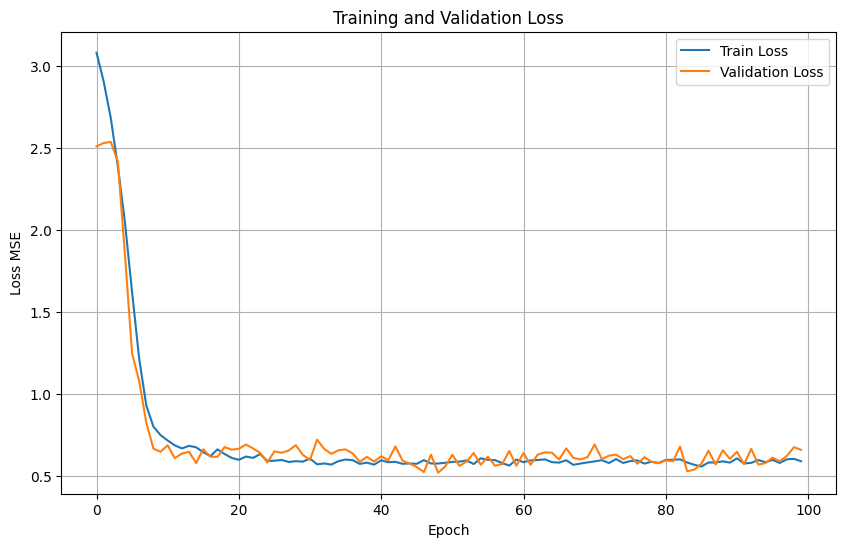

In [73]:
from sklearn.model_selection import KFold
from torch.utils.data import Dataset, DataLoader

train_losses = []
val_losses = []

# 自定义数据集
class TextDataset(Dataset):
    def __init__(self, embeddings, rel, pot):
        self.embeddings = embeddings
        self.rel = rel
        self.pot = pot
        
    def __len__(self):
        return len(self.embeddings)
    
    def __getitem__(self, idx):
        return (
            torch.tensor(self.embeddings[idx]),
            torch.tensor(self.rel[idx]),
            torch.tensor(self.pot[idx])
        )

# 初始化K折
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
embeddings = np.load('embeddings.npy')
dataset = TextDataset(embeddings, relevance, potential)

# 训练配置
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.MSELoss()  # 回归任务用MSE损失
epochs = 100
results = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
    print(f'\n=== Fold {fold+1}/5 ===')
    
    # 数据加载器
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx)
    val_subsampler = torch.utils.data.SubsetRandomSampler(val_idx)
    train_loader = DataLoader(dataset, batch_size=16, sampler=train_subsampler)
    val_loader = DataLoader(dataset, batch_size=16, sampler=val_subsampler)
    
    # 初始化模型
    model = DualRegression().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5)
    
    # 训练循环
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for emb, rel, pot in train_loader:
            emb, rel, pot = emb.to(device), rel.to(device), pot.to(device)
            
            optimizer.zero_grad()
            pred_rel, pred_pot = model(emb)
            
            loss_rel = criterion(pred_rel, rel)
            loss_pot = criterion(pred_pot, pot)
            loss = 0.5*loss_rel + 0.5*loss_pot  # 双任务等权损失
            
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # 验证评估
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for emb, rel, pot in val_loader:
                emb, rel, pot = emb.to(device), rel.to(device), pot.to(device)
                pred_rel, pred_pot = model(emb)
                
                loss_rel = criterion(pred_rel, rel)
                loss_pot = criterion(pred_pot, pot)
                val_loss += (0.5*loss_rel + 0.5*loss_pot).item()
        train_losses.append(train_loss/len(train_loader))
        val_losses.append(val_loss/len(val_loader))
        
        scheduler.step(val_loss)
        print(f'Epoch {epoch+1}/{epochs} | Train Loss: {train_loss/len(train_loader):.4f} | Val Loss: {val_loss/len(val_loader):.4f}')
    
    # 保存最佳模型
    torch.save(model.state_dict(), f'model_fold{fold}.pth')
    results.append(val_loss/len(val_loader))

print(f'\nK-Fold结果: 平均验证损失 {np.mean(results):.4f}')

train_losses=np.array(train_losses).reshape(5,100)
train_mean=np.mean(train_losses,axis=0)
train_mean=train_mean.reshape(1,100)
val_losses=np.array(val_losses).reshape(5,100)
val_mean=np.mean(val_losses,axis=0)
val_mean=val_mean.reshape(1,100)


plt.figure(figsize=(10,6))
plt.plot(train_mean[0], label='Train Loss')
plt.plot(val_mean[0], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss MSE')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [74]:
import torch
import numpy as np
from sentence_transformers import SentenceTransformer
from torch import nn

# 1. 定义与训练时相同的模型结构
class DualRegression(nn.Module):
    def __init__(self, input_dim=384, hidden_dim=64):
        super().__init__()
        self.shared_layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.relevance_head = nn.Sequential(
            nn.Linear(hidden_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1))
        self.potential_head = nn.Sequential(
            nn.Linear(hidden_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1))

    def forward(self, x):
        shared = self.shared_layers(x)
        relevance = self.relevance_head(shared)
        potential = self.potential_head(shared)
        return relevance.squeeze(), potential.squeeze()

# 2. 加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_path = "/Users/yiangxu/Desktop/爬虫/fenxi/model_fold4.pth"

# 初始化模型并加载权重
model = DualRegression().to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()  # 设置为评估模式（禁用dropout等）

# 3. 初始化Sentence-BERT编码器

# 4. 定义预测函数
def predict(text):
    # 文本编码
    embedding = sbert.encode([text], convert_to_tensor=True)
    
    # 模型预测
    with torch.no_grad():
        rel_score, pot_score = model(embedding.to(device))
    
    # 转换为Python标量值
    return rel_score.item(), pot_score.item()

# 5. 使用示例
if __name__ == "__main__":
    # 测试文本
    test_text = "上海."
    
    # 进行预测
    relevance, potential = predict(test_text)
    
    # 打印结果（限制在1-3分范围内）
    print(f"预测结果:")
    print(f"相关度: {max(1.0, min(3.0, relevance)):.2f}")
    print(f"商业潜力: {max(1.0, min(3.0, potential)):.2f}")
    
    # 批量预测示例
    texts = [
        "上海东海职业技术学院经管学院实训室硬件升级项目竞争性磋商公告【项目概况】： 系统集成，项目预算55万元。\n【项目内容】： 经管学院实训室硬件升级，合同签订后20天内交付。\n【投标人资格要求】： 符合政府采购法，无失信记录，不接受联合体。",
        "复旦大学附属华山医院总院信息中心机房改造扩容更正公告 【项目概况】： 系统集成，项目预算未明确。【项目内容】： 复旦大学附属华山医院总院信息中心机房改造扩容。【投标人资格要求】： 资质要求未明确，需联系采购代理机构了解详情。",
        "上海市精神卫生中心家具项目三的公开招标公告 【项目概况】： 家具采购项目，预算金额为302.25万元。项目内容】： 采购病区、诊疗家具，数量为3包。投标人资格要求】： 符合政府采购法，面向中小企业，不接受联合投标。"
    ]
    
    print("\n批量预测结果:")
    for text in texts:
        rel, pot = predict(text)
        print(f"文本: {text[:30]}... | 相关度: {max(1.0, min(3.0, rel)):.2f} | 潜力: {max(1.0, min(3.0, pot)):.2f}")

预测结果:
相关度: 1.00
商业潜力: 1.00

批量预测结果:
文本: 上海东海职业技术学院经管学院实训室硬件升级项目竞争性磋商公告... | 相关度: 1.45 | 潜力: 1.35
文本: 复旦大学附属华山医院总院信息中心机房改造扩容更正公告 【项目... | 相关度: 1.34 | 潜力: 1.24
文本: 上海市精神卫生中心家具项目三的公开招标公告 【项目概况】： ... | 相关度: 1.45 | 潜力: 1.42


/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_96772/93263358.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, m

In [75]:
玩具集=[]
结果=pd.DataFrame({"文本":玩具集,"相关度":0,"潜力":0})
while len(玩具集)<100:
    玩具集.append(np.random.choice((df['text'])))

for item in 玩具集:
    rel, pot = predict(item)
    print(f"文本: {item[:30]}... | 相关度: {max(1.0, min(3.0, rel)):.2f} | 潜力: {max(1.0, min(3.0, pot)):.2f}")
    结果.loc[len(结果)]=item,rel,pot

结果


    

文本: ['校园', '消防设施', '建设', '改造', '（'... | 相关度: 1.46 | 潜力: 1.55
文本: ['医院', '集体婚礼', '策划', '布景', '服务... | 相关度: 1.56 | 潜力: 1.55
文本: ['上海市第六人民医院', '政府', '采购', '项目'... | 相关度: 1.61 | 潜力: 1.62
文本: ['医院', '集体婚礼', '策划', '布景', '服务... | 相关度: 1.56 | 潜力: 1.55
文本: ['同济大学四平路校区南区新建宿舍楼项目', '—', '—... | 相关度: 1.60 | 潜力: 1.66
文本: ['上海音乐学院', '南', '中', '教学楼', '在... | 相关度: 1.65 | 潜力: 1.57
文本: ['手术', '显微镜', '等', '设备', '一批',... | 相关度: 1.51 | 潜力: 1.50
文本: ['上海市眼病防治中心', '眼科', '光学', '生物'... | 相关度: 1.54 | 潜力: 1.55
文本: ['上海大学', '宝山', '校区', '校内', '14... | 相关度: 1.44 | 潜力: 1.51
文本: ['上海交通大学', '闵行校', '区', '上院', '... | 相关度: 1.64 | 潜力: 1.65
文本: ['关于', '复旦大学附属华山医院', '（', 'PET... | 相关度: 1.67 | 潜力: 1.70
文本: ['[', '比选', '公告', ']', '口岸', '... | 相关度: 1.42 | 潜力: 1.37
文本: ['碳纳米管', '阵列', '自', '组装', '模拟'... | 相关度: 1.38 | 潜力: 1.40
文本: ['上海科技大学', '硬', 'X射线', '自由电子',... | 相关度: 1.28 | 潜力: 1.30
文本: ['上海外国语大学贤达经济人文学院', '艺术', '实践'... | 相关度: 1.30 | 潜力: 1.27
文本: ['上海科技大学', '硬', 'X射线', '自由电子',... | 相关度: 1.25 | 潜力: 1.23
文本: ['医院', '集体婚礼', '策划',

,文本,相关度,潜力
0,"['校园', '消防设施', '建设', '改造', '（', '二期', '）', '招标...",1.461904,1.546492
1,"['医院', '集体婚礼', '策划', '布景', '服务', '询价', '公告'] ...",1.555532,1.550994
2,"['上海市第六人民医院', '政府', '采购', '项目', '（', '十四', '）'...",1.612651,1.617569
3,"['医院', '集体婚礼', '策划', '布景', '服务', '询价', '公告'] ...",1.555532,1.550994
4,"['同济大学四平路校区南区新建宿舍楼项目', '—', '—', '补充', '招标', '...",1.598799,1.660053
...,...,...,...
95,"['上海交通大学医学院', '医用', '冷藏', '冷冻', '冰箱', '等', '设备...",1.546328,1.530682
96,"['[', '更正', '公告', ']', '行政', '楼', '财务', '大厅', ...",1.550763,1.561207
97,"['2025', '年', '小学生', '爱心', '暑托班', '可视化', '管理',...",1.486518,1.436479
98,"['上海交通大学', '闵行校', '区', '上院', '教室', '集控', '设备',...",1.644443,1.648119


In [76]:
#测试一下模型是否成功
#先用标题来测试一下吧
import numpy as np
a=np.random.choice(data["标题"],10)
a
测试文本=a
测试文本=np.append(测试文本,['上海家里蹲大学吃火锅'])
print(测试文本)

测试文本_embedding=sbert.encode(测试文本)

#手搓余弦定理距离函数
print(np.dot(测试文本_embedding[0],测试文本_embedding[1]) / (np.linalg.norm(测试文本_embedding[0]) * np.linalg.norm(测试文本_embedding[1])))
#距离函数matrix
距离矩阵=np.zeros((len(测试文本),len(测试文本)))
for i in range(len(测试文本)):
    for j in range(len(测试文本)):
        distance=np.dot(测试文本_embedding[i],测试文本_embedding[j]) / (np.linalg.norm(测试文本_embedding[i]) * np.linalg.norm(测试文本_embedding[j]))
        距离矩阵[i,j]=distance
距离矩阵=pd.DataFrame(距离矩阵)
距离矩阵.columns=测试文本
距离矩阵.index=测试文本
距离矩阵


['上海交通大学医学院附属新华医院宫颈激光治疗的比价公告' '2025年两校区学生宿舍开水机采购竞价公告'
 '同济大学选聘资产评估机构采购项目招标公告' '上海交通大学医学院附属新华医院存储扩容及备份设备采购项目公开招标公告'
 '上海交通大学医学院附属新华医院院内药品运输车、电动液压叉车采购的比价公告'
 '[招服2025A00012]上海交通大学徐汇校区周边公寓（番禺路875弄等)物业服务项目采购公告'
 '上海工商职业技术学院公共机房桌面云服务项目招标公告' '上海第二工业大学近代物理实验系列项目（第二次）延期公告'
 '上海大学落地式大容量超速离心机国际招标公告（重新招标）' '上海交通大学医学院附属新华医院人流机的比价公告' '上海家里蹲大学吃火锅']
0.5287948


,上海交通大学医学院附属新华医院宫颈激光治疗的比价公告,2025年两校区学生宿舍开水机采购竞价公告,同济大学选聘资产评估机构采购项目招标公告,上海交通大学医学院附属新华医院存储扩容及备份设备采购项目公开招标公告,上海交通大学医学院附属新华医院院内药品运输车、电动液压叉车采购的比价公告,[招服2025A00012]上海交通大学徐汇校区周边公寓（番禺路875弄等)物业服务项目采购公告,上海工商职业技术学院公共机房桌面云服务项目招标公告,上海第二工业大学近代物理实验系列项目（第二次）延期公告,上海大学落地式大容量超速离心机国际招标公告（重新招标）,上海交通大学医学院附属新华医院人流机的比价公告,上海家里蹲大学吃火锅
上海交通大学医学院附属新华医院宫颈激光治疗的比价公告,1.000000,0.528795,0.580767,0.794468,0.818223,0.712691,0.788398,0.703020,0.706977,0.816453,0.587077
2025年两校区学生宿舍开水机采购竞价公告,0.528795,1.000000,0.520514,0.565158,0.541049,0.545761,0.552568,0.504389,0.522095,0.568394,0.459346
同济大学选聘资产评估机构采购项目招标公告,0.580767,0.520514,1.000000,0.753405,0.697513,0.620206,0.742767,0.700249,0.601001,0.657309,0.416928
上海交通大学医学院附属新华医院存储扩容及备份设备采购项目公开招标公告,0.794468,0.565158,0.753405,1.000000,0.947576,0.888559,0.965905,0.844404,0.760805,0.872496,0.528102
上海交通大学医学院附属新华医院院内药品运输车、电动液压叉车采购的比价公告,0.818223,0.541049,0.697513,0.947576,1.000000,0.855060,0.918254,0.781969,0.754031,0.933508,0.528939
[招服2025A00012]上海交通大学徐汇校区周边公寓（番禺路875弄等)物业服务项目采购公告,0.712691,0.545761,0.620206,0.888559,0.855060,1.000000,0.894895,0.831413,0.704698,0.804141,0.533694
上海工商职业技术学院公共机房桌面云服务项目招标公告,0.788398,0.552568,0.742767,0.965905,0.918254,0.894895,1.000000,0.864945,0.760002,0.862619,0.575237
上海第二工业大学近代物理实验系列项目（第二次）延期公告,0.703020,0.504389,0.700249,0.844404,0.781969,0.831413,0.864945,1.000000,0.684293,0.735052,0.568821
上海大学落地式大容量超速离心机国际招标公告（重新招标）,0.706977,0.522095,0.601001,0.760805,0.754031,0.704698,0.760002,0.684293,1.000000,0.813460,0.608123
上海交通大学医学院附属新华医院人流机的比价公告,0.816453,0.568394,0.657309,0.872496,0.933508,0.804141,0.862619,0.735052,0.813460,1.000000,0.590880
